# Load data

In [24]:
import pandas as pd
from sklearn.datasets import load_iris

In [25]:
# load iris dataset
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns= iris.feature_names)
df['Species']=iris.target
df['Species']= df['Species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

In [26]:
# explore the data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [27]:
# summary statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
# class distributions of the flowers 
df['Species'].value_counts()

Species
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

# EDA

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

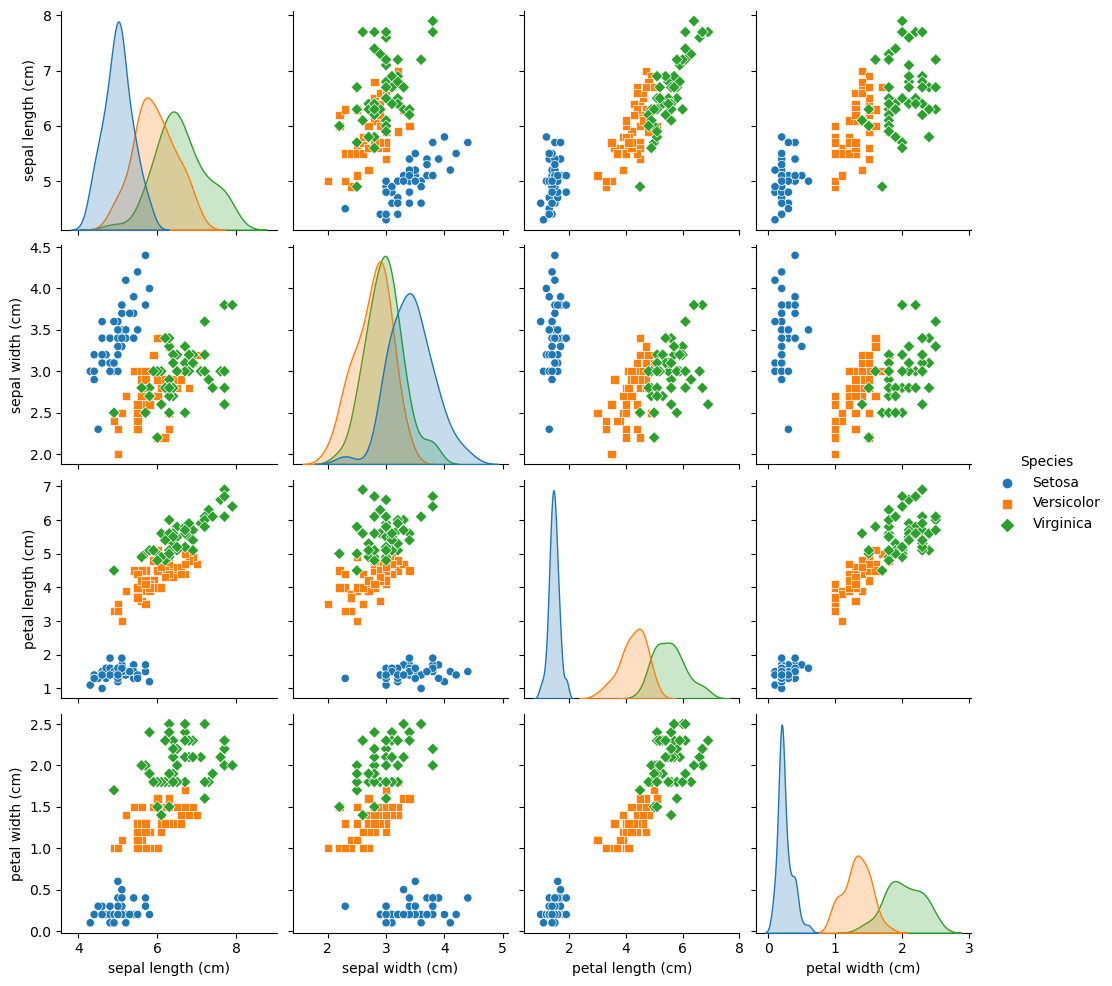

In [30]:
# pair plot
sns.pairplot(df, hue ='Species', markers =['o','s','D'])
plt.show()

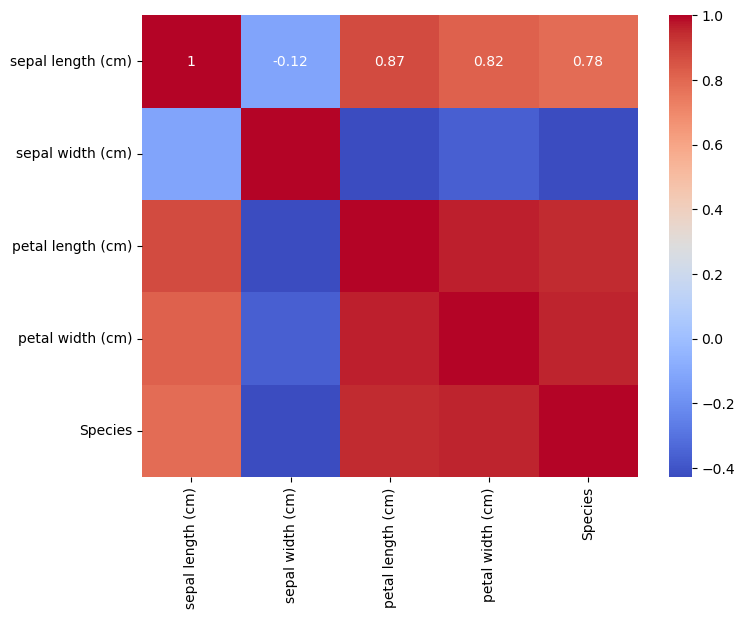

In [31]:
# heatmap of the correlation matrix
plt.figure(figsize=(8,6))
data = pd.DataFrame(data = iris.data, columns= iris.feature_names)
data['Species']=iris.target

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# data preprocessing 

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split the data
x = df.drop('Species', axis = 1)
y = df['Species']

In [33]:
# split the data to train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
# standardise the features
scaler = StandardScaler()

In [35]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Train the model

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [37]:
# train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [38]:
# make prediction
y_pred = model.predict(x_test)

In [39]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667

In [40]:
# classification report
print(f"classification_report: \n\n {classification_report(y_test,y_pred)}")

classification_report: 

               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.90      1.00      0.95         9
   Virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [41]:
# confusion matrix
print(f'confusion_matrix: \n\n {confusion_matrix(y_test, y_pred)}')

confusion_matrix: 

 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
